# *Webscrapen aus Webpagen*

In [44]:
import json
import psycopg2
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
driver = webdriver.Remote(
    command_executor='selenium_containers:4444',
    options=chrome_options
)

base_url = 'https://www.autoscout24.ch/de/autos/audi--a5?make=5&uprop=2&model=27&vehtyp=10'
driver.get(base_url)

# Get the page source
page_source = driver.page_source
print(page_source)

# Close the driver
driver.quit()


<html lang="en"><head><noscript data-next-hide-fouc="true"><style>body{display:block}</style></noscript><meta charset="utf-8"><meta name="viewport" content="width=device-width"><link rel="icon" href="data:image/x-icon;base64,AAABAAEAAAAAAAEAIACwFgAAFgAAAIlQTkcNChoKAAAADUlIRFIAAAEAAAABAAgGAAAAXHKoZgAA
    AAFvck5UAc+id5oAABZqSURBVHja7Z1nfFTltodDL4HQQu8llJCQSaEqTZBeFERQEBUEpaiASjly
    EEUFERUQVA6i2BUpKoiCHQvqEQUERZp0pNivlXtdd681mWQSEsRzZM9k9vPh+RlpM5ns9V/1XW9U
    amqqAIA3ieJDAEAAAAABAAAEAAAQAABAAAAAAQAABAAAEAAAQAAAAAEAAAQAABAAAEAAAAABAAAE
    AAAQAABAAAAAAQAABAAAEAAAQAAAAAEAAAQAABAAAEAAAAABAAAEAAAQAABAAAAAAQAABAAAEAAA
    QAAAAAEAAAQAABAAAASADwEAAQAABAAAEAAAQAAAAAEAAAQAABAAAEAAAAABAAAEAAAQAABAAAAA
    AQAABAAAEAAAQAAAAAEAAAQAABAAAEAAAAABAAAEAAAQAABAAAAAAQAABAAAEAAAQAAAAAEAAAQA
    ABAAgNCQkpIqyclp4nNo2jQFAQDwisE3a5YiXTo1keGX15e7b6sm119TR9LSEACAiEINXklzvu7Q
    PkkuHdhQZt5cXV58uqx89FpJeWVZGZl/ZxXpf0G8dOrYRJo3T0EAAPKkhzeDTxWfL83+/+yzkuXC
    vvFy4/W1ZcnD5WXzumj5blcB+d+vokS+jpK9G4vIfbOqyE

# *Daten aus Excel in die DB schreiben*

In [2]:
import pandas as pd

df = pd.read_csv('autos.csv', sep=',')
df.head(5)
print(df.describe())

               id         price        year  engine_power
count  490.000000    490.000000  490.000000    489.000000
mean   612.481633  32523.797959    6.601603    217.073620
std    141.863945  19593.487781    3.163389     33.986417
min    367.000000   3980.000000    1.200800    143.000000
25%    490.250000  15984.750000    4.201725    190.000000
50%    612.500000  29900.000000    6.201250    211.000000
75%    734.750000  43996.750000    9.201600    245.000000
max    858.000000  94888.000000   12.202200    286.000000


In [3]:
from sqlalchemy import create_engine, text

# Datenbankverbindung herstellen
engine = create_engine('postgresql://admin:secret@db:5432/postgres')

# Tabelle "autos" aus der Datenbank löschen
with engine.connect() as connection:
    drop_table_query = text("DROP TABLE IF EXISTS autos")
    connection.execute(drop_table_query)

df.to_sql('autos', engine, if_exists='replace')


490

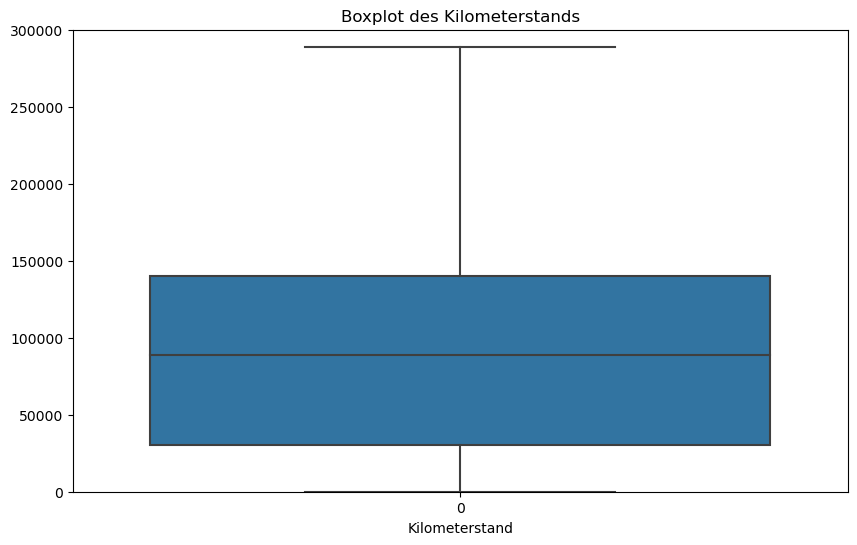

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Datenbankverbindung herstellen
engine = create_engine('postgresql://admin:secret@db:5432/postgres')

# Daten aus der Datenbank abrufen
query = "SELECT mileage FROM autos"
df_mileage = pd.read_sql_query(query, engine)

# Tausendertrennzeichen entfernen und in numerischen Datentyp konvertieren
df_mileage['mileage'] = df_mileage['mileage'].str.replace("'", "").astype(float)

# Boxplot des Kilometerstands anzeigen
plt.figure(figsize=(10, 6))
sns.boxplot(df_mileage['mileage'])
plt.ylim(0, 300000)
plt.xlabel('Kilometerstand')
plt.title('Boxplot des Kilometerstands')
plt.show()


In [55]:
print(df['year'].unique())

[ 5.2023  3.2023  4.2022  6.2019  5.2022  6.2021 12.2011 10.2017 10.2016
  8.2011  8.2009  8.2007  1.2014  8.2018 12.2015 10.202   8.2012  1.2012
 12.2007 12.2013 10.2019  6.202   2.2016  9.2009  4.2013  7.201   3.2011
  2.2022  3.2019  5.2019  4.2017  4.2015  9.2013  1.2021  3.2017 12.2016
 10.2009 11.2009  9.2021  3.2016  4.2021  8.2021  5.2021  7.2021  8.2019
 12.2018  9.2019  3.2021  7.2018  7.2013 11.2018 11.2016  1.2022  6.2018
  1.201   6.2022  9.2012  4.2019  6.2009 11.2017  9.2022  2.2019 12.2022
  6.2017  7.202   8.2017  2.2021  7.2017  1.202   2.2013  8.2022  5.2015
 11.2019  5.2017  3.2013  7.2022  3.2022  8.2015 12.2017 11.202   8.2008
  5.2011  5.2018  9.2017  9.2007 10.2021  9.202   1.2023  3.201   6.2012
 12.202  12.201   2.202   4.2011 11.2011  5.2012 12.2012 11.2022  8.2016
  4.201   4.2018  1.2018 10.2018  5.2013  5.2009  5.201   7.2019  2.2011
 12.2014 10.2015  9.2018  6.2014  1.2019  3.2018 10.2013  7.2014  4.2008
  9.2008  7.2009  7.2008  6.2015  6.2011  5.2014 11

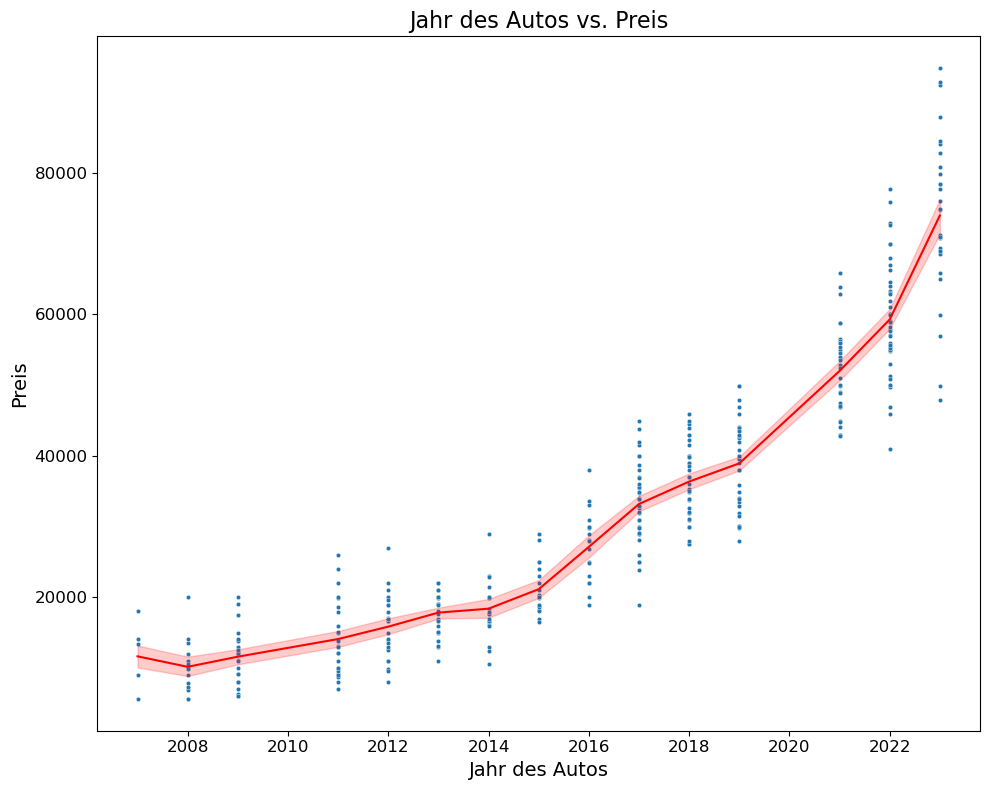

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine

# Database connection setup
db_url = 'postgresql://admin:secret@db:5432/postgres'
engine = create_engine(db_url)

# Data retrieval from the database
query = """
SELECT 
    year,
    price 
FROM autos
"""
df = pd.read_sql_query(query, engine)

# Extract year from the 'year' column
df['year'] = df['year'].apply(lambda x: int(str(x).split('.')[1]) if '.' in str(x) else x)

# Filter the data to only include years from 1995 onwards
df = df[df['year'] >= 1995]

# Sort by year for the moving average calculation
df = df.sort_values('year')

# Calculate moving average
window = 2
df['moving_avg'] = df['price'].rolling(window).mean()

# Scatterplot creation
plt.figure(figsize=(10, 8))
sns.scatterplot(x='year', y='price', data=df, s=10)
sns.lineplot(x='year', y='moving_avg', data=df, color='red')

# Plot aesthetics
plt.title('Jahr des Autos vs. Preis', fontsize=16)
plt.xlabel('Jahr des Autos', fontsize=14)
plt.ylabel('Preis', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()




Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


NaN values in df: model    0
price    0
dtype: int64
Epoch 1/100
16/16 [==============================] - 0s 2ms/step - loss: 32518.5098
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 32511.0547
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 32504.2539
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 32497.2578
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 32489.9609
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 32482.3555
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 32474.4238
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 32466.1875
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 32457.6367
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 32448.7832
Epoch 11/100
16/16 [==============================] - 0s 3ms/step - loss: 32439.6152
Epoch 12/100
16/16 [=

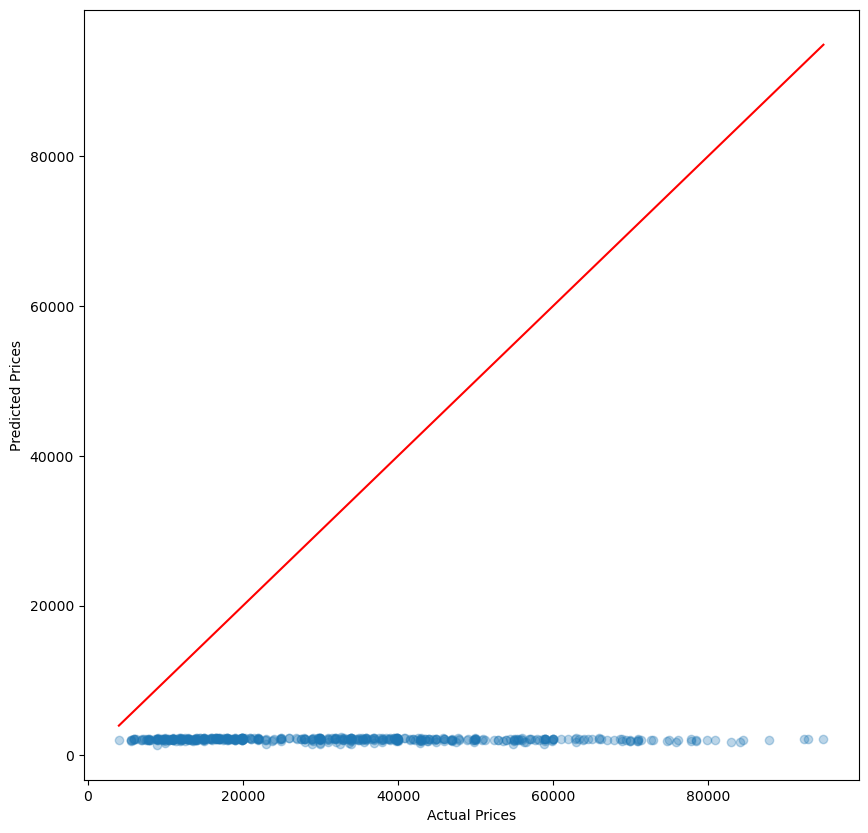

In [49]:
import pandas as pd
from sqlalchemy import create_engine
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import MeanAbsoluteError
import matplotlib.pyplot as plt
import numpy as np

# Database connection setup
db_url = 'postgresql://admin:secret@db:5432/postgres'
engine = create_engine(db_url)

# Data retrieval from the database
query = "SELECT model, price FROM autos"
df = pd.read_sql_query(query, engine)

# NLP Preprocessing
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = TFBertModel.from_pretrained('bert-base-uncased')

inputs = tokenizer(df['model'].tolist(), return_tensors='tf', truncation=True, padding=True, max_length=64)
outputs = model_bert(inputs)
embeddings = outputs.last_hidden_state[:, 0, :].numpy()

# Check for NaN or infinite values in the data
print("NaN values in df:", df.isnull().sum())

# Define model
input_a = Input(shape=(embeddings.shape[1],))
dense = Dense(10, activation='relu')(input_a)  
output = Dense(1)(dense)
model = Model(inputs=input_a, outputs=output)

# Compile and train model
model.compile(loss=MeanAbsoluteError(), optimizer=RMSprop(lr=0.001))
model.fit(embeddings, df['price'], epochs=100, batch_size=32)

# Make predictions
predictions = model.predict(embeddings)

# Reshape predictions to match the shape of df['price']
predictions = predictions.flatten()

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'actual': df['price'], 'predicted': predictions})

# Visualize the results
plt.figure(figsize=(10, 10))
plt.scatter(results['actual'], results['predicted'], alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(df['price']), max(df['price'])], [min(df['price']), max(df['price'])], color='red')  # Ideal prediction line
plt.show()


In [54]:
print(results['actual'])
print(results['predicted'])

0      56940
1      49800
2      74900
3      59900
4      92400
       ...  
485    14990
486     5500
487    37890
488    42800
489    18200
Name: actual, Length: 490, dtype: int64
0      2118.015625
1      1766.019653
2      1977.994141
3      1829.991089
4      2031.091064
          ...     
485    1976.684692
486    1789.266479
487    1701.595825
488    1596.107788
489    2026.303101
Name: predicted, Length: 490, dtype: float32


# *Modell erstellen mit Transformers*

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


NaN values in df: model    0
price    0
dtype: int64
Epoch 1/10
16/16 [==============================] - 0s 4ms/step - loss: 60.1010
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 40.1366
Epoch 3/10
16/16 [==============================] - 0s 4ms/step - loss: 31.8565
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 25.8006
Epoch 5/10
16/16 [==============================] - 0s 6ms/step - loss: 21.0223
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 17.1949
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 14.1085
Epoch 8/10
16/16 [==============================] - 0s 4ms/step - loss: 11.6178
Epoch 9/10
16/16 [==============================] - 0s 4ms/step - loss: 9.5822
Epoch 10/10
16/16 [==============================] - 0s 2ms/step


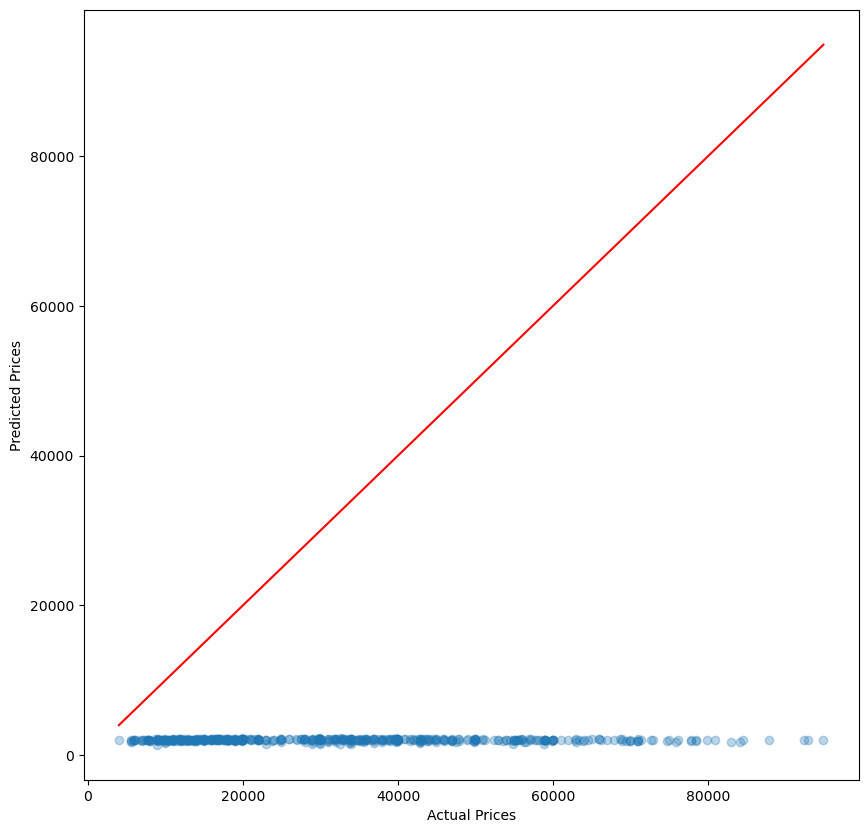

In [53]:
import pandas as pd
from sqlalchemy import create_engine
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

# Database connection setup
db_url = 'postgresql://admin:secret@db:5432/postgres'
engine = create_engine(db_url)

# Data retrieval from the database
query = "SELECT model, price FROM autos"
df = pd.read_sql_query(query, engine)

# NLP Preprocessing
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = TFBertModel.from_pretrained('bert-base-uncased')

inputs = tokenizer(df['model'].tolist(), return_tensors='tf', truncation=True, padding=True, max_length=64)
outputs = model_bert(inputs)
embeddings = outputs.last_hidden_state[:, 0, :].numpy()

# Check for NaN or infinite values in the data
print("NaN values in df:", df.isnull().sum())

# Define model
input_a = Input(shape=(embeddings.shape[1],))
dense1 = Dense(128, activation='relu')(input_a)
dense2 = Dense(64, activation='relu')(dense1)
output = Dense(1, activation='relu')(dense2)
model = Model(inputs=input_a, outputs=output)

# Compile and train model
model.compile(loss='mean_squared_logarithmic_error', optimizer=RMSprop(lr=0.001))
model.fit(embeddings, df['price'], epochs=10, batch_size=32)

# Make predictions
predictions = model.predict(embeddings)

# Reshape predictions to match the shape of df['price']
predictions = predictions.flatten()

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'actual': df['price'], 'predicted': predictions})

# Visualize the results
plt.figure(figsize=(10, 10))
plt.scatter(results['actual'], results['predicted'], alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(df['price']), max(df['price'])], [min(df['price']), max(df['price'])], color='red')  # Ideal prediction line
plt.show()


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse = mean_squared_error(results['actual'], results['predicted'])
mae = mean_absolute_error(results['actual'], results['predicted'])
r2 = r2_score(results['actual'], results['predicted'])

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R^2 Score:', r2)


Mean Squared Error: 1392662494.7634609
Mean Absolute Error: 31770.18235467405
R^2 Score: -2.635043396932373


# *Wichtigkeit von S-Line*

In [15]:
# Create a new column indicating if 'S-line' is in the model description
df['s_line'] = df['model'].apply(lambda x: 's-line' in x.lower() or 'sline' in x.lower())

# Compare the average prices
average_price_s_line = df[df['s_line']]['price'].mean()
average_price_no_s_line = df[~df['s_line']]['price'].mean()

print(f'Durchschnittlicher Preis für Autos mit S-line: {average_price_s_line}')
print(f'Durchschnittlicher Preis für Autos ohne S-line: {average_price_no_s_line}')


Durchschnittlicher Preis für Autos mit S-line: 52313.24590163935
Durchschnittlicher Preis für Autos ohne S-line: 25963.165760869564


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from scipy.sparse import hstack

# Create TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df['model'])

# Convert the 's_line' column to an integer
df['s_line'] = df['s_line'].astype(int)

# Add the 's_line' column to the features
# Use the 'hstack' function from scipy.sparse to stack the sparse matrix and the 's_line' column
X = hstack([X_tfidf, df['s_line'].values.reshape(-1, 1)])

# Fit a linear regression model
reg = LinearRegression()
reg.fit(X, df['price'])

# Print the coefficient for the 's_line' feature
# Note: The coefficient corresponding to 's_line' will be the last one, 
# because 's_line' was added to 'X' after 'X_tfidf'
print(f'Coefficient for S-line: {reg.coef_[-1]}')



Coefficient for S-line: 10319.18185079965


# *Model Nummer 2 *

In [50]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime
from transformers import BertTokenizer, TFBertModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
import numpy as np
import matplotlib.pyplot as plt

# Database connection setup
db_url = 'postgresql://admin:secret@db:5432/postgres'
engine = create_engine(db_url)

# Data retrieval from the database
query = "SELECT model, year, address, mileage, fuel_type, engine_power, price FROM autos"
df = pd.read_sql_query(query, engine)

# NLP Preprocessing
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = TFBertModel.from_pretrained('bert-base-uncased')

inputs = tokenizer(df['model'].tolist(), return_tensors='tf', truncation=True, padding=True, max_length=64)
outputs = model_bert(inputs)
embeddings = outputs.last_hidden_state[:, 0, :].numpy()

# Preprocess other features
enc = OneHotEncoder()
features = enc.fit_transform(df[['year', 'address', 'mileage', 'fuel_type', 'engine_power']]).toarray()

# Ensure the number of rows in embeddings, features and df['price'] matches
embeddings = embeddings[:len(df)]
features = features[:len(df)]
df = df.iloc[:len(embeddings)]

# KFold Cross Validation
kf = KFold(n_splits=5)
mse_list, mae_list, r2_list = [], [], []

for train_index, val_index in kf.split(embeddings):
    train_embeddings, val_embeddings = embeddings[train_index], embeddings[val_index]
    train_features, val_features = features[train_index], features[val_index]
    train_price, val_price = df['price'].iloc[train_index], df['price'].iloc[val_index]

    # Define model
    input_a = Input(shape=(train_embeddings.shape[1],))
    input_b = Input(shape=(train_features.shape[1],))
    combined = Concatenate()([input_a, input_b])
    dense = Dense(100, activation='relu')(combined)
    output = Dense(1)(dense)
    model = Model(inputs=[input_a, input_b], outputs=output)

    # Compile and train model
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit([train_embeddings, train_features], train_price, epochs=10, batch_size=32)

    # Make predictions
    predictions = model.predict([val_embeddings, val_features])

    # Compute metrics
    mse = mean_squared_error(val_price, predictions)
    mae = mean_absolute_error(val_price, predictions)
    r2 = r2_score(val_price, predictions)

    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)

# Print average metrics
print('Average Mean Squared Error:', np.mean(mse_list))
print('Average Mean Absolute Error:', np.mean(mae_list))
print('Average R^2 Score:', np.mean(r2_list))


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/10
13/13 [==============================] - 0s 5ms/step - loss: 1196432768.0000
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 1195093376.0000
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 1193356160.0000
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 1191223424.0000
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 1188571904.0000
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 1185455104.0000
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 1181737600.0000
Epoch 8/10
13/13 [==============================] - 0s 6ms/step - loss: 1177462656.0000
Epoch 9/10
13/13 [==============================] - 0s 6ms/step - loss: 1172662784.0000
Epoch 10/10
4/4 [==============================] - 0s 3ms/step
Epoch 1/10
13/13 [==============================] - 1s 5ms/step - loss: 1326668928.0000
Epoch 2/10
13/13 [==============================] - 0s 5m